<a href="https://colab.research.google.com/github/naomifridman/Introduction_to_deep_learning/blob/master/lec5_Cnn_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (Convulotional Neural Networks)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.losses import categorical_crossentropy

# random seeds must be set before importing keras & tensorflow
my_seed = 512
np.random.seed(my_seed)
import random 
random.seed(my_seed)

from IPython.display import Image
from IPython.core.display import HTML 

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# cb - cotrast_brightness
def show_n_images(imgs, cmap='gray', titles = None, enlarge = 4, mtitle=None,
                  cut = 0, axis_off = False, fontsize=40, cb = 1):
    
    plt.set_cmap(cmap);
    
    n = len(imgs);
    gs1 = gridspec.GridSpec(1, n);
    
    fig1 = plt.figure(figsize=(8*len(imgs),8)); 
    for i in range(n):

        ax1 = fig1.add_subplot(gs1[i]);
        if (cb):
            if len(np.unique(imgs[i])<=5):
                 img = imgs[i]
            else:
                
                img = cont_br(imgs[i])
        else:
            img = imgs[i]
        if cut:
            ax1.imshow(img[50:290, 75:450] , interpolation='none');
        else:
            
            ax1.imshow(img, interpolation='none');
        if (titles is not None):
            ax1.set_title(titles[i], fontsize=fontsize);  #, fontweight="bold");
        if (axis_off):
            plt.axis('off')
    if mtitle:
        plt.title(mtitle)
    plt.tight_layout()
    plt.show();

# Convolution block
Conv2D -> Conv2D->Maxpooling->Dropout

# CNN (Convulotional Neural Networks)

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/general_cnn.jpeg)

## Example (MNIST)


Solving MNIST classification using CNN ([Based on this example in keras docs](https://github.com/meenuagarwal/MNIST-Classification-Using-Keras))

### The data

In [ ]:
from sklearn.utils import shuffle
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


MNIST is a classification problem, so we use the `to_categorical()` to convert the target.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()

y_train = le.fit(y_train).transform(y_train)
y_test = le.transform(y_test)
y_test.shape

(10000, 10)

### The model - Classical (Alexnet VGG Style) Convolution block

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
model = Sequential()
model.add(Input((28, 28, 1)))
model.add(Conv2D(filters=32,  kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                46090     
Total params: 55,658
Trainable params: 55,658
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

### Fitting

In [ ]:
batch_size = 128
epochs = 2

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/2
469/469 [==============================] - 35s 74ms/step - loss: 0.1625 - accuracy: 0.9497 - val_loss: 0.0613 - val_accuracy: 0.9801
Epoch 2/2
469/469 [==============================] - 32s 68ms/step - loss: 0.0834 - accuracy: 0.9736 - val_loss: 0.0459 - val_accuracy: 0.9851


### Validation

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04588911682367325
Test accuracy: 0.9850999712944031


### Filters

Here are some examples of filters (called kernels) applied in mnist images:

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/mnist_kernels.png)

# VGG

Vgg16 build of:
* convolution blocs
* flat
* 2 dense Layers
* Softmax/Sigmoid to classify
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/vgg16.png)

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/mnist_conv.png)

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/example_of_conv_layers.png)

In [ ]:
# From here
* block architectire
* general architecture
* special gates

# Autoencoder

## Idea and basic concepts

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/auto_encoder.png)

## Example (MNIST)

### Building the model

We choose the dimensionality of the encoding.

In [ ]:
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)
print(x_train.shape)

(60000, 784)


In [ ]:
model = Sequential()
#model.add(    Flatten(input_shape = (784,))
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(    Dense(128))
model.add( Dropout(0.5))
model.add(  Dense(10, name='latent'))
model.add( Dropout(0.5))
model.add(    Dense(128))
model.add( Dropout(0.5))
model.add(    Dense(256))
model.add( Dropout(0.5))
model.add(    Dense(28*28))

model = Sequential()
#model.add(    Flatten(input_shape = (784,))
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(  Dense(10))
model.add( Dropout(0.5))
model.add(    Dense(28*28))

In [ ]:
model.compile(optimizer='adam', 
                    loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
latent (Dense)               (None, 10)                1290      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
input_dim = 784
encoding_dim = 32  

In [ ]:
history = model.fit(x_train, x_train,
                epochs=8,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/8
235/235 [==============================] - 3s 11ms/step - loss: 0.0577 - val_loss: 0.0522
Epoch 2/8
235/235 [==============================] - 3s 11ms/step - loss: 0.0573 - val_loss: 0.0524
Epoch 3/8
235/235 [==============================] - 3s 11ms/step - loss: 0.0570 - val_loss: 0.0519
Epoch 4/8
235/235 [==============================] - 3s 12ms/step - loss: 0.0568 - val_loss: 0.0514
Epoch 5/8
235/235 [==============================] - 3s 13ms/step - loss: 0.0566 - val_loss: 0.0519
Epoch 6/8
235/235 [==============================] - 3s 12ms/step - loss: 0.0565 - val_loss: 0.0514
Epoch 7/8
235/235 [==============================] - 3s 12ms/step - loss: 0.0564 - val_loss: 0.0517
Epoch 8/8
235/235 [==============================] - 3s 12ms/step - loss: 0.0563 - val_loss: 0.0518


In [ ]:
pred = model.predict(x_test[0:3])
pred.shape

(3, 784)

<Figure size 432x288 with 0 Axes>

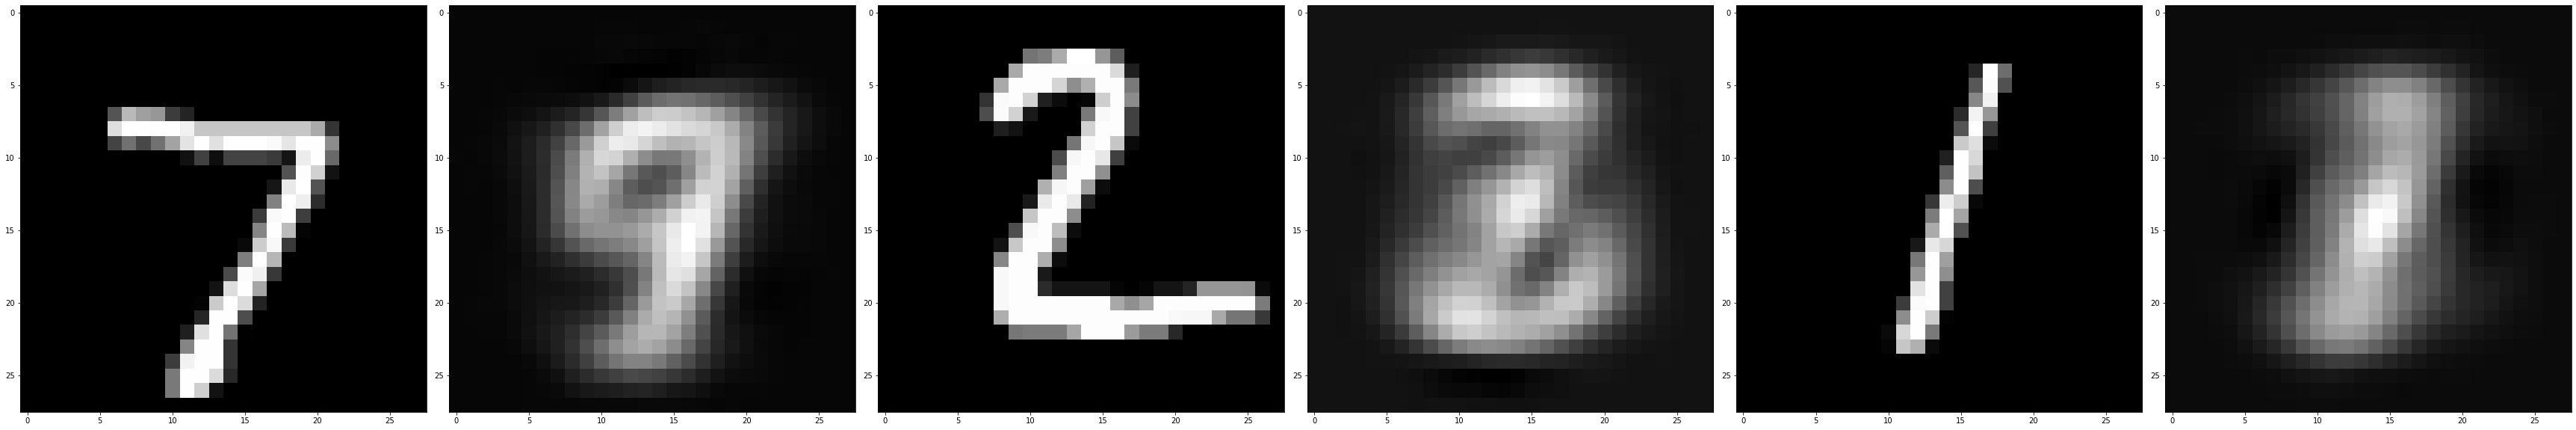

In [ ]:
show_n_images([x_test[0].reshape(28,28), pred[0].reshape(28,28), 
               x_test[1].reshape(28,28), pred[1].reshape(28,28),
              x_test[2].reshape(28,28), pred[2].reshape(28,28)])

In [ ]:
from keras.models import Model

layer_name = 'latent'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_test[0:3])
intermediate_output

array([[ 0.13887891, -0.11026566,  0.05972666,  0.05807294,  0.92575824,
        -0.44056863,  1.1819007 ,  0.15145117,  0.44083402,  0.74755675],
       [ 0.30735892, -0.01057586,  0.17358318,  0.24692087, -1.1249082 ,
         0.6083149 , -1.2545716 , -0.11254144, -0.6551471 , -0.40552592],
       [ 0.8132543 ,  0.57657385,  0.34392092,  0.8795795 , -0.7121798 ,
        -0.07454451, -0.5600993 ,  0.0335349 ,  0.40414536,  0.25117975]],
      dtype=float32)

In [ ]:
np.argmax(intermediate_output, axis=1)

array([6, 5, 3], dtype=int64)

## Noise filtering using autoencoders

In [ ]:
x_train = np.reshape(X_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(X_test, (len(x_test), 28, 28, 1))  

In [ ]:


# Lets create noisy digits
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.2, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.2, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

<Figure size 432x288 with 0 Axes>

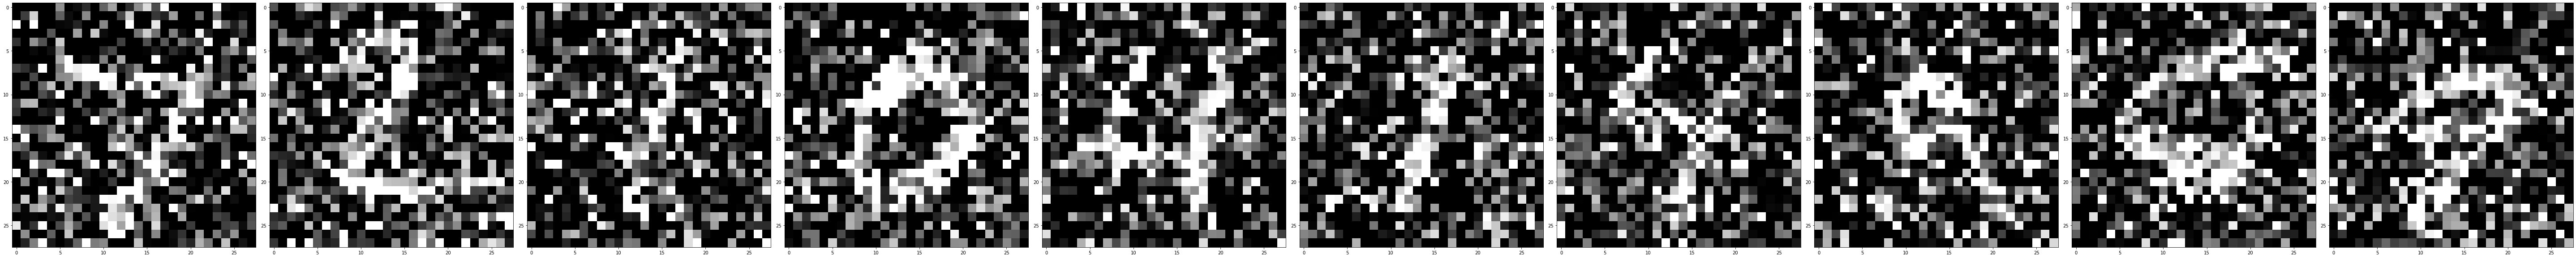

In [ ]:
show_n_images([x_test_noisy[k].reshape(28,28) for k in range(10)])

Here's what the noisy digits look like:

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 28, 28, 32)        924

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/2
469/469 [==============================] - 66s 140ms/step - loss: 0.1486 - val_loss: 0.1331
Epoch 2/2
469/469 [==============================] - 62s 133ms/step - loss: 0.1312 - val_loss: 0.1277


In [ ]:
pred = autoencoder.predict(x_test_noisy[0:5])
pred.shape

(5, 28, 28, 1)

<Figure size 432x288 with 0 Axes>

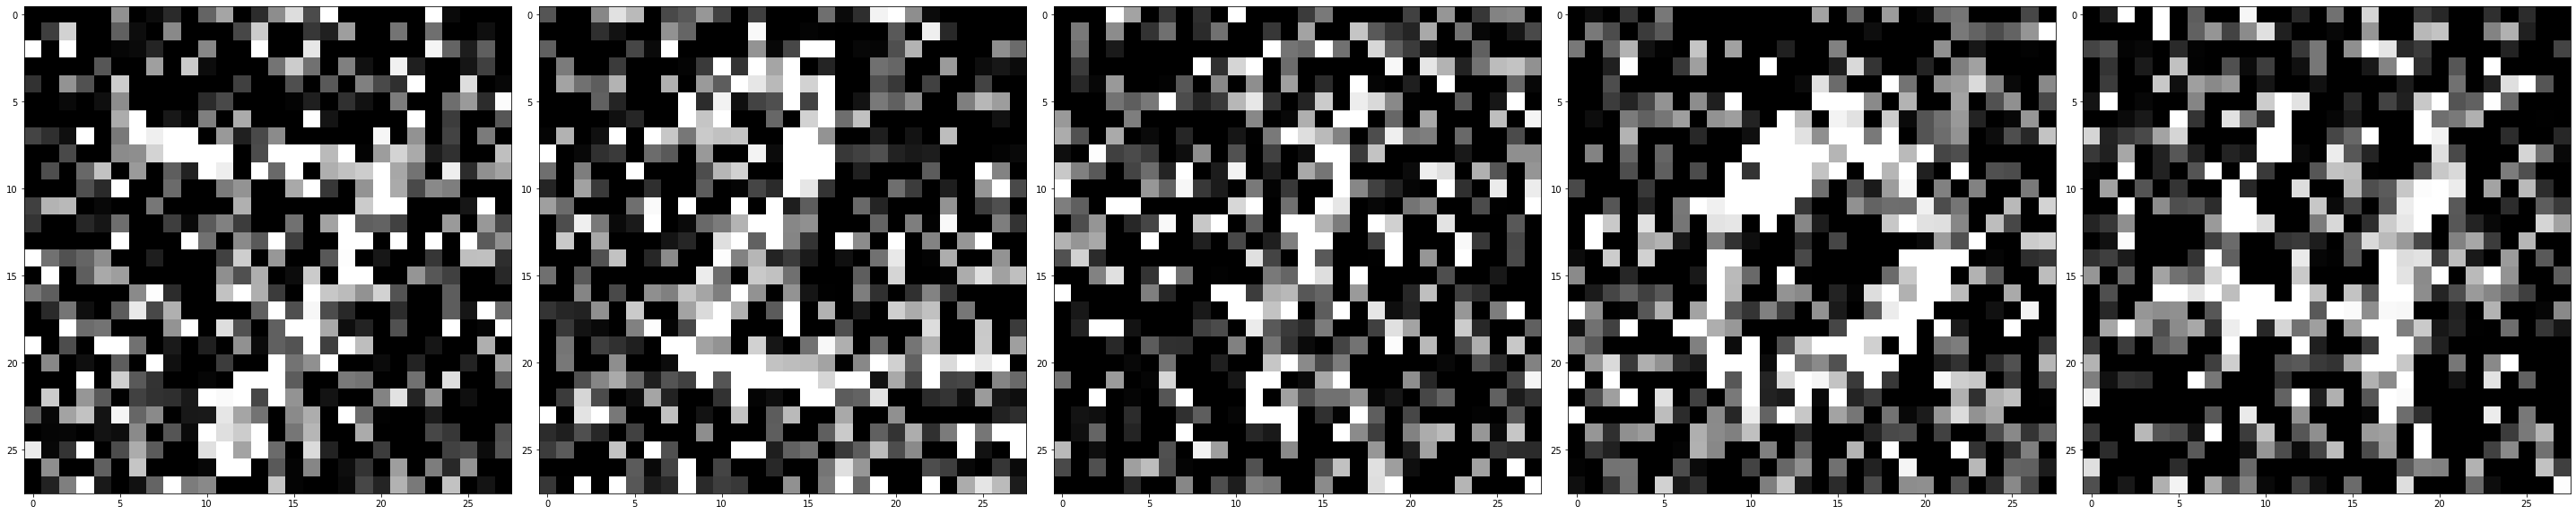

<Figure size 432x288 with 0 Axes>

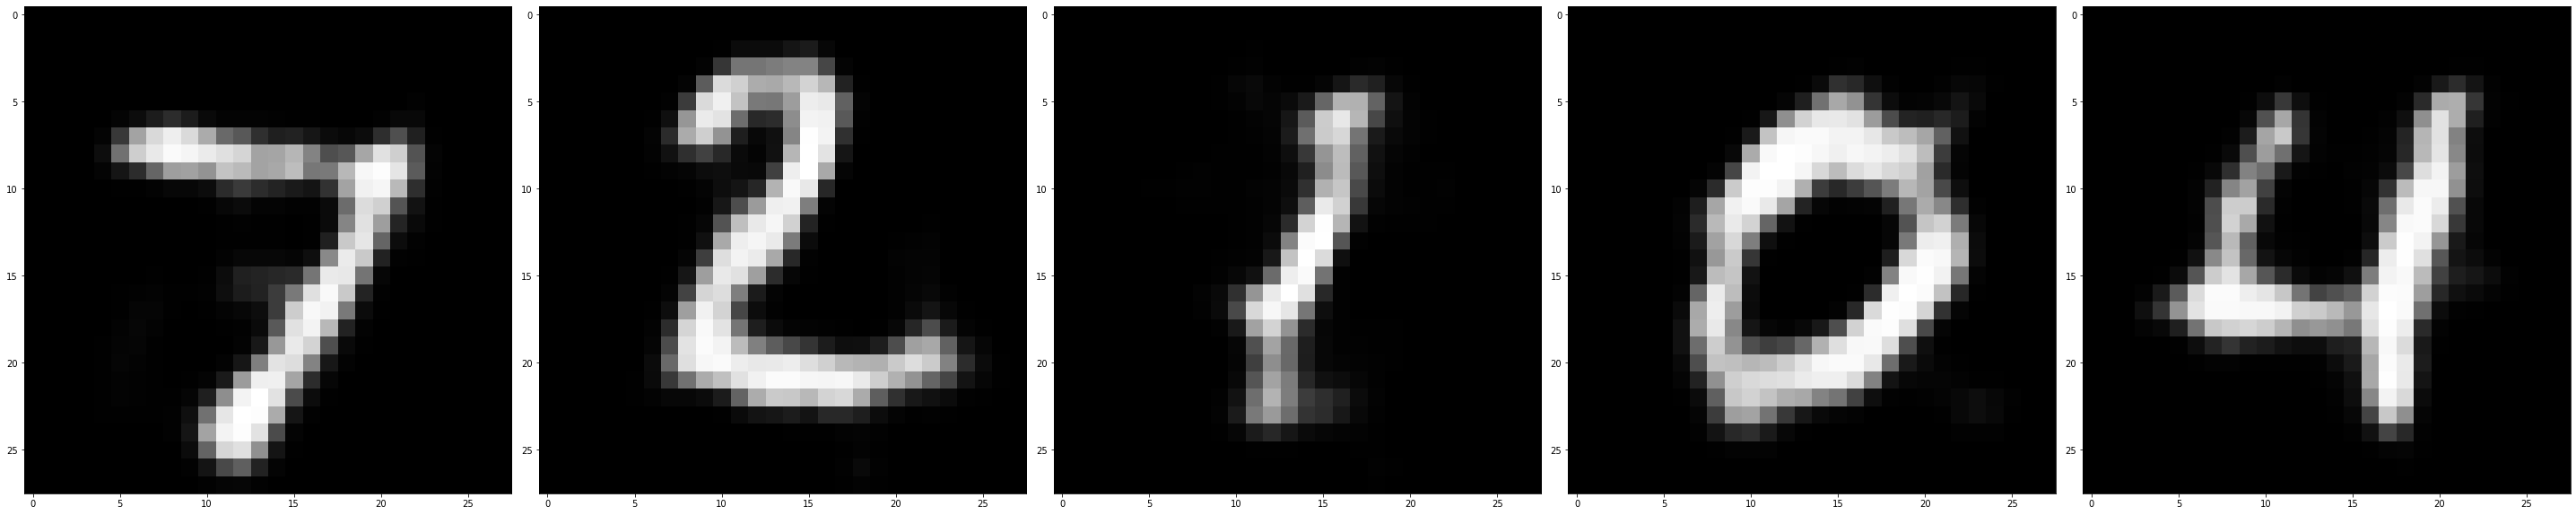

<Figure size 432x288 with 0 Axes>

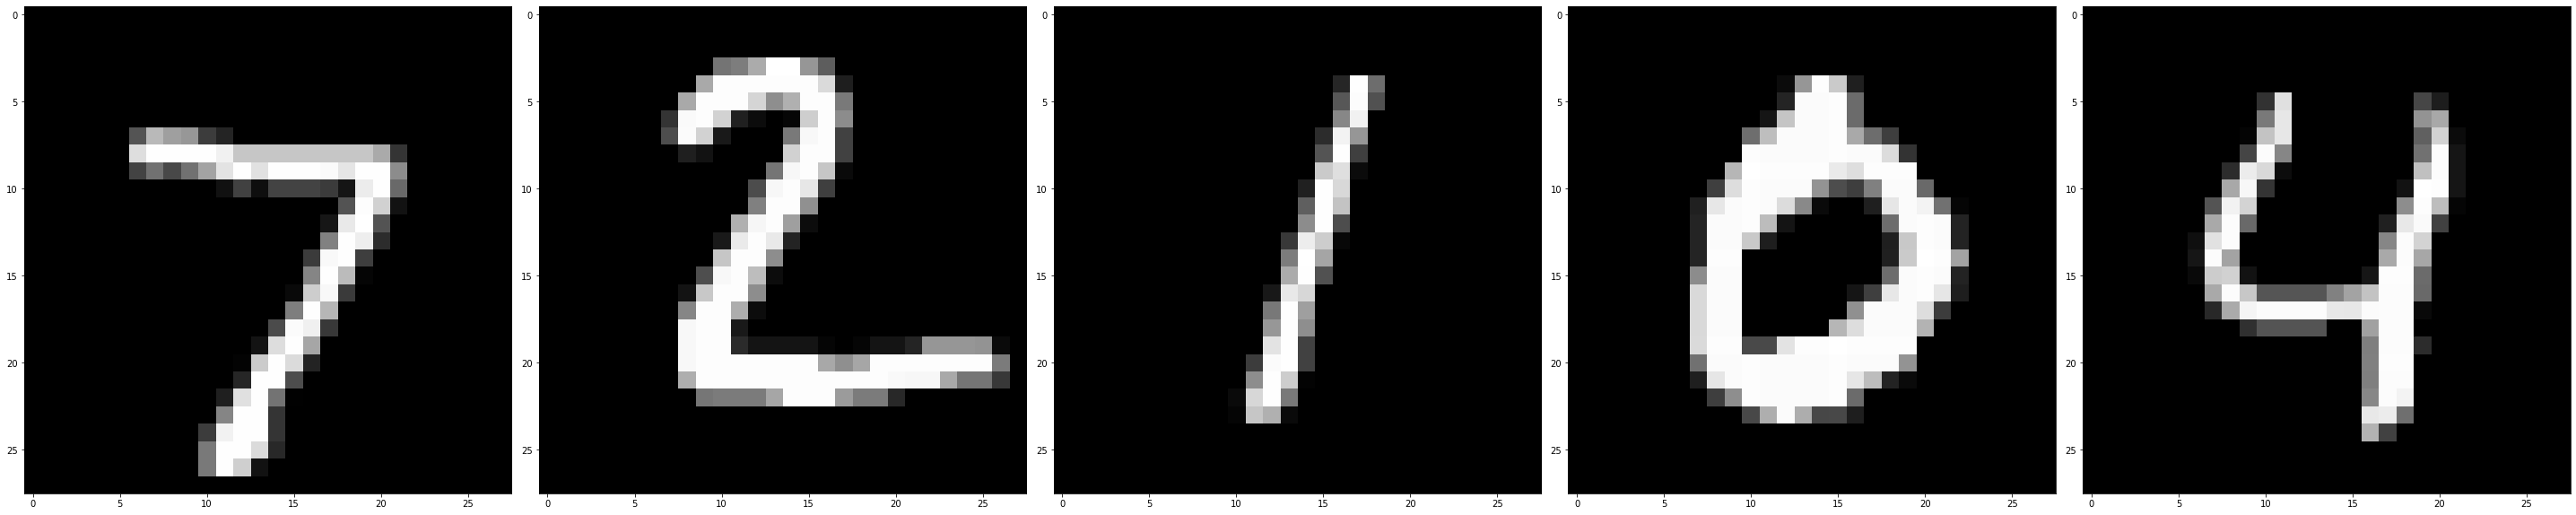

In [ ]:
show_n_images([x_test_noisy[k].reshape(28,28) for k in range(5)])
show_n_images([pred[k].reshape(28,28) for k in range(5)]         )     
show_n_images([x_test[k].reshape(28,28) for k in range(5)]  )


# UNET

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/unet.png)

## Loss function for segmentation
* IoU = Area of Intersection / Area of Union

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/iou.png)

In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)